In [1]:
import collections
import inspect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/administrator/code/python/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

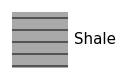

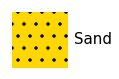

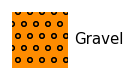

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
transforms = {c : graphiclog.utils.string2array for c in ['depth_m', 'grain_size_mm']}

beds = pd.read_csv('../data/AllBedsWithProfiles.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,0.115051,1.0,0.116073,0.117046,0.520514,0.021978,"[22.81684, 22.70297, 22.53372, 22.50602]","[0.115051, 0.1157124, 0.1170462, 0.1170462]"
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[22.50602, 21.89671]","[0.001, 0.001]"
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,0.125380,1.0,0.125380,0.125380,0.520514,0.021978,"[21.89671, 21.79208]","[0.1253796, 0.1253796]"
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.79208, 21.67514]","[0.001, 0.001]"
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,0.134306,1.0,0.150073,0.160420,0.520514,0.021978,"[21.67514, 21.63514, 21.56744, 21.54282]","[0.1343059, 0.1446953, 0.1604199, 0.1604199]"


In [5]:
for i, (name, grp) in enumerate(beds.groupby('name')):
    if i == 0:
        continue
    if i > 1:
        break
        
    grp['grain_size_psi'] = grp['grain_size_mm'].apply(graphiclog.wentworth.gs2psi)
    
    bedseq = graphiclog.BedSequence.from_dataframe(grp, topcol='tops', thickcol='th',
                                         component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                         datacols=['th', 'mean_gs_mm', 'depth_m', 'grain_size_psi'],
                                         metacols=['name', 'collection', 'eod', 'eodnum'])
    
    print(bedseq.values, bedseq.metadata)
    

elev_gap: 87.42309000000004
depth_gap: 5.826450433232822e-13
[[ 1.32920000e-01  1.74892175e-01  8.17069500e+01 -2.75982002e+00]
 [ 1.32920000e-01  1.74892175e-01  8.17647400e+01 -2.52076033e+00]
 [ 1.32920000e-01  1.74892175e-01  8.18109700e+01 -2.39084493e+00]
 ...
 [ 3.87190000e-01  1.25036885e-01  1.49239100e+02 -3.04440984e+00]
 [ 3.87190000e-01  1.25036885e-01  1.49470300e+02 -2.37946464e+00]
 [ 3.87190000e-01  1.25036885e-01  1.49504900e+02 -2.37946464e+00]] {'name': 'Amazon 936A', 'collection': 'Amazon', 'eod': 'fan', 'eodnum': 1}


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
bedseq.start, bedseq.stop

(Position({'middle': 81.70695, 'units': 'm'}),
 Position({'middle': 149.50494, 'units': 'm'}))

-11 -10 -8 colloid
-10 -8 -7 clay
-8 -7 -6 vf_silt
-7 -6 -5 f_silt
-6 -5 -4 m_silt
-5 -4 -3 c_silt
-4 -3 -2 vf_sand
-3 -2 -1 f_sand
-2 -1 0 m_sand
-1 0 1 c_sand
0 > 0, breaking
-11 -10 -8 colloid
-10 -8 -7 clay
-8 -7 -6 vf_silt
-7 -6 -5 f_silt
-6 -5 -4 m_silt
-5 -4 -3 c_silt
-4 -3 -2 vf_sand
-3 -2 -1 f_sand
-2 -1 0 m_sand
-1 0 1 c_sand
0 > 0, breaking


/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/administrator/anaconda3/envs/core-dev/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


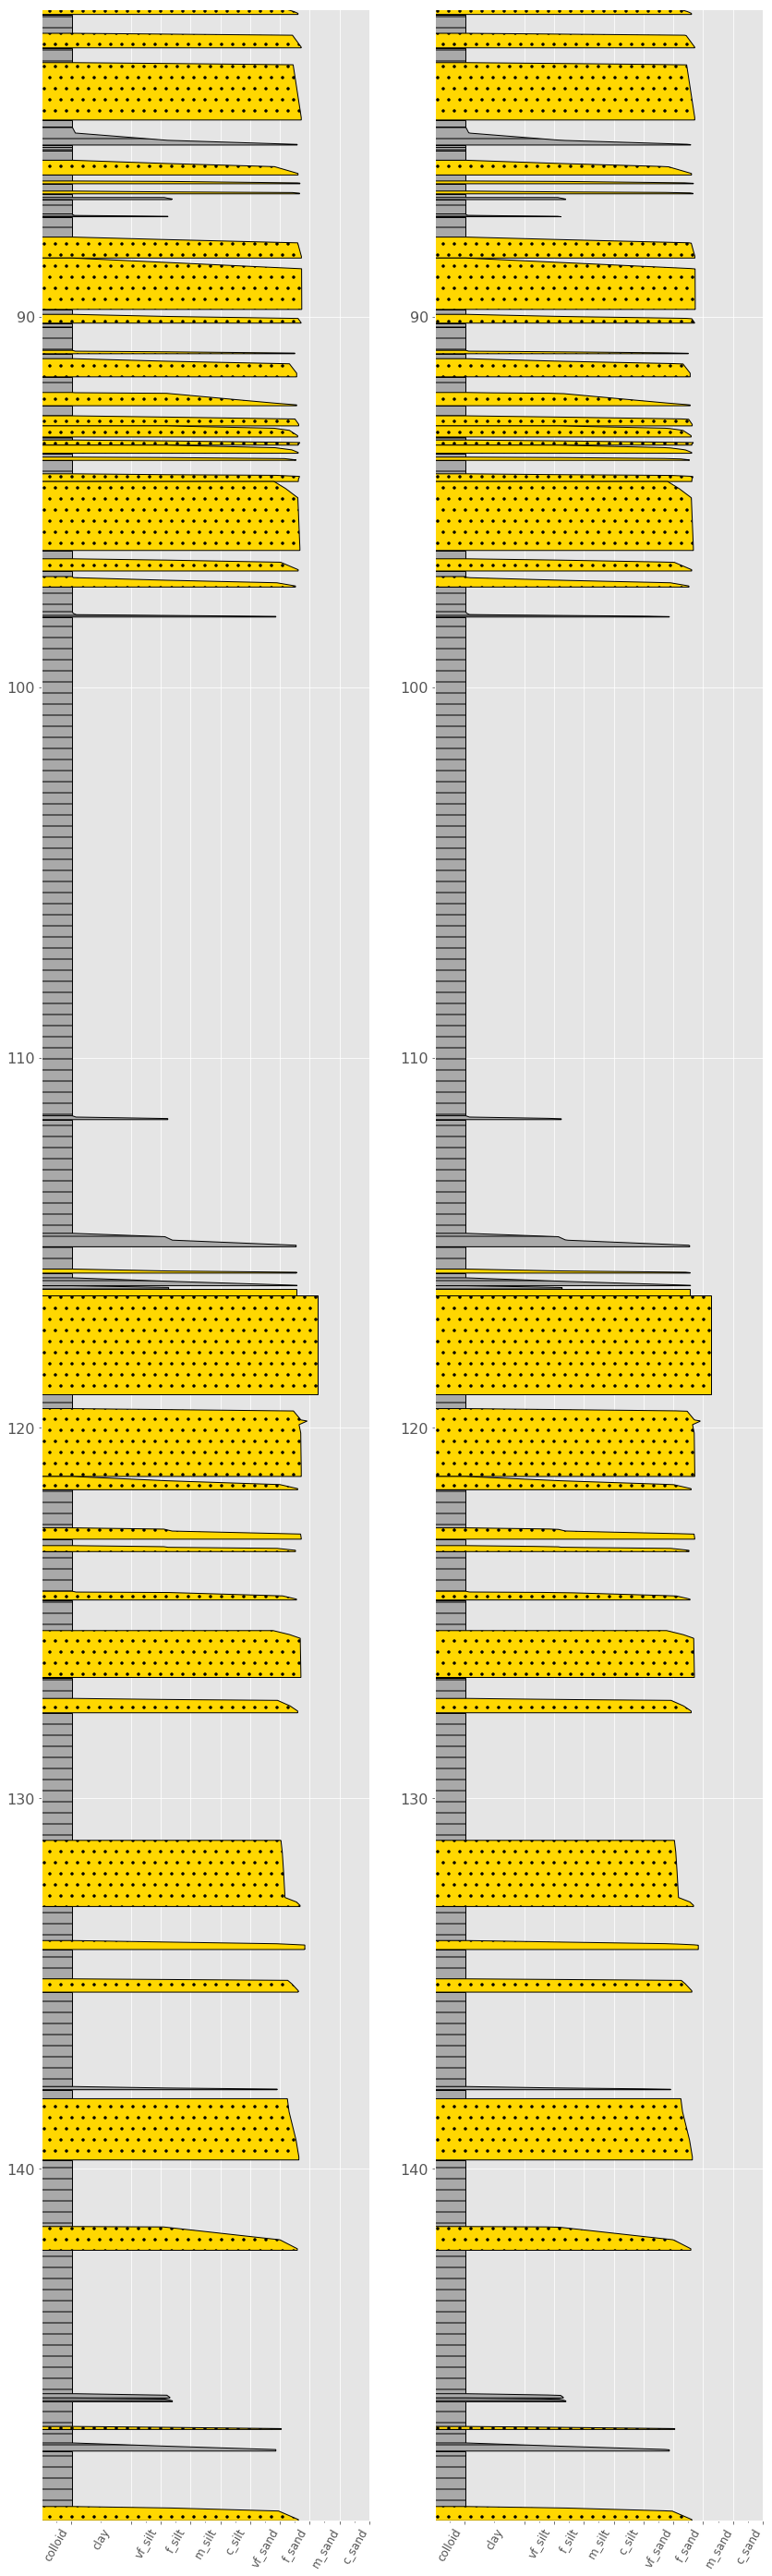

In [7]:
fig, ax = plt.subplots(figsize=(14,50), ncols=2)
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[0])

bedseq.resample_data('depth_m', 0.01)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[1])

In [8]:
bedseq.min_field('grain_size_psi')

-9.965784284662087

In [9]:
-1 > bedseq.max_field('grain_size_psi')

True

-11 -8 -4 clay
-8 -4 1 silt
-4 1 6 sand
1 > 0, breaking


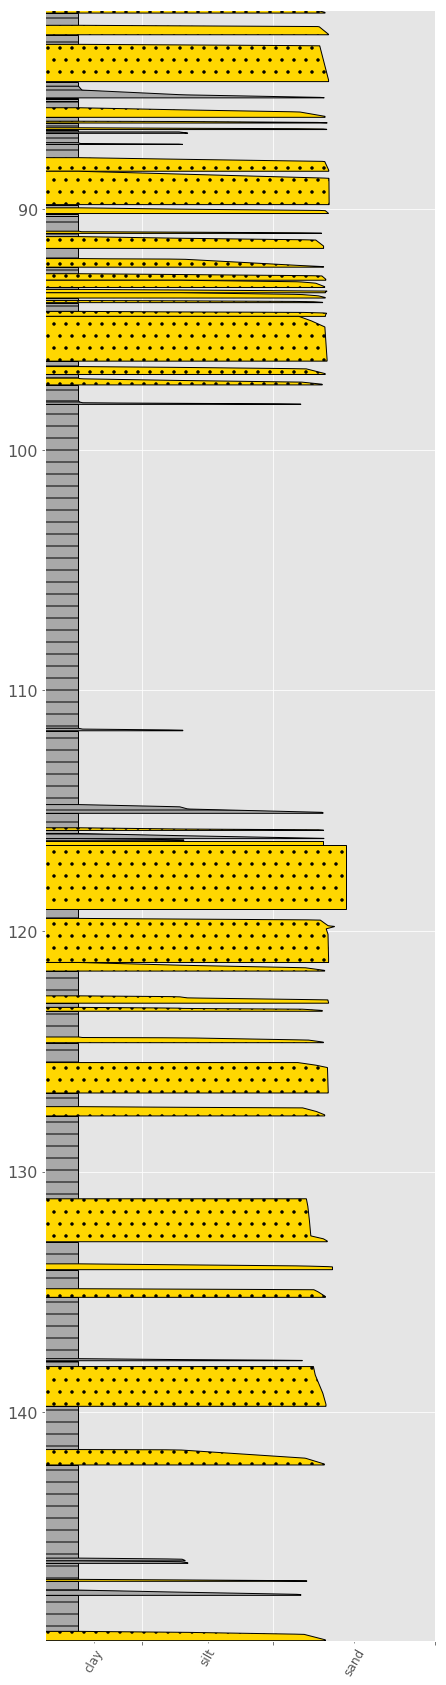

In [10]:
fig, ax = plt.subplots(figsize=(7,30))
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', 
            wentworth='coarse', ax=ax)